In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
%matplotlib inline

In [2]:
df_mkd = pd.read_csv('corona_north_macedonia.csv')

In [3]:
df_china = pd.read_csv('corona_china.csv')

In [5]:
data = np.array(df_china['active'])

In [6]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data.reshape(-1,1))

In [7]:
length = 15
batch_size = 1
n_features = 1

In [8]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data, length=length, batch_size=1)

In [87]:
model = Sequential()
model.add(LSTM(100 , activation='relu', input_shape=[length,n_features]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [88]:
model.fit_generator(generator, epochs=20)

Epoch 1/20
50/50 [==============================] - 2s 39ms/step - loss: 0.0856
Epoch 2/20
50/50 [==============================] - 2s 36ms/step - loss: 0.0359
Epoch 3/20
50/50 [==============================] - 2s 37ms/step - loss: 0.0182
Epoch 4/20
50/50 [==============================] - 2s 36ms/step - loss: 0.0118
Epoch 5/20
50/50 [==============================] - 2s 39ms/step - loss: 0.0082
Epoch 6/20
50/50 [==============================] - 2s 38ms/step - loss: 0.0075
Epoch 7/20
50/50 [==============================] - 2s 40ms/step - loss: 0.0071
Epoch 8/20
50/50 [==============================] - 2s 38ms/step - loss: 0.0067
Epoch 9/20
50/50 [==============================] - 2s 39ms/step - loss: 0.0045
Epoch 10/20
50/50 [==============================] - 2s 38ms/step - loss: 0.0040
Epoch 11/20
50/50 [==============================] - 2s 37ms/step - loss: 0.0028
Epoch 12/20
50/50 [==============================] - 2s 38ms/step - loss: 0.0031
Epoch 13/20
50/50 [==================

In [113]:
model.save('lstm_corona.h5')

In [9]:
model = load_model('lstm_corona.h5')

In [10]:
test_predictions = []
periods = 65
#first_eval_batch = scaled_train[-length:]
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [11]:
forecast_predictions = full_scaler.inverse_transform(test_predictions)

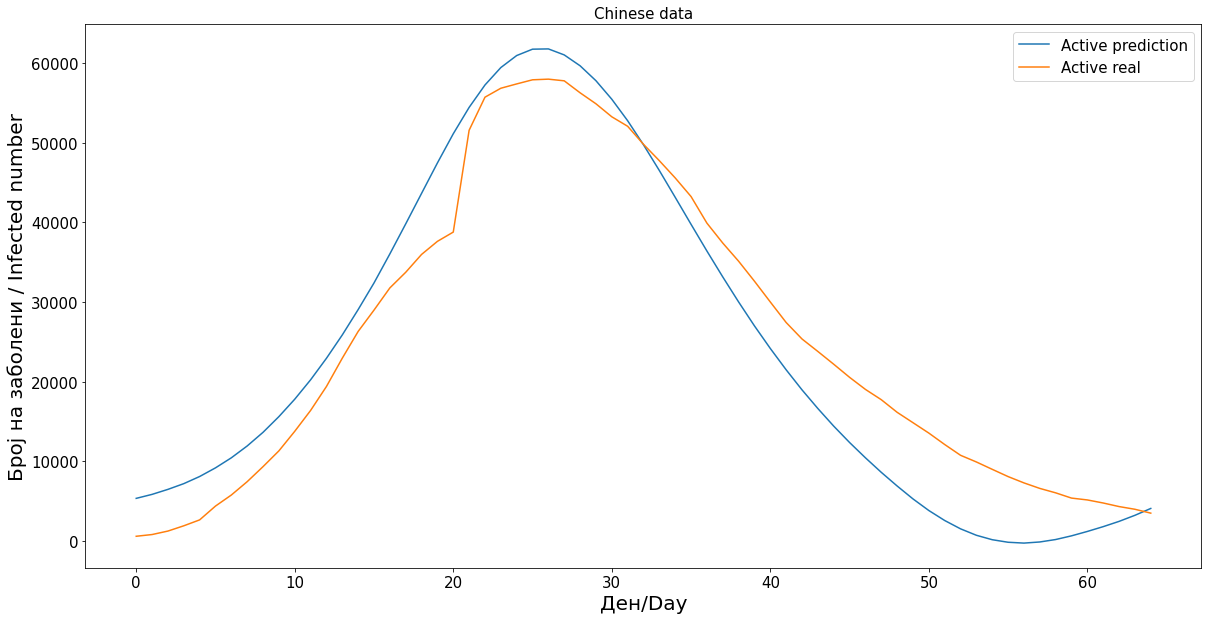

In [12]:
plt.figure(figsize=(20,10))
plt.title("Chinese data", fontsize=15)
plt.plot(forecast_predictions, label = 'Active prediction')
plt.plot(df_china['active'], label = 'Active real')
plt.xlabel("Ден/Day", fontsize=20)
plt.ylabel("Активни потврдени вкупно /  Active confirmed cases total", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

In [13]:
scaled_full_data_mkd = full_scaler.fit_transform(np.array(df_mkd['active']).reshape(-1,1))

In [14]:
test_predictions = []
periods = 59
first_eval_batch = scaled_full_data_mkd[:length]
#first_eval_batch = scaled_full_data_mkd[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [15]:
forecast_predictions_mkd = full_scaler.inverse_transform(test_predictions)

In [20]:
active = np.array(df_mkd['active'][-40:])

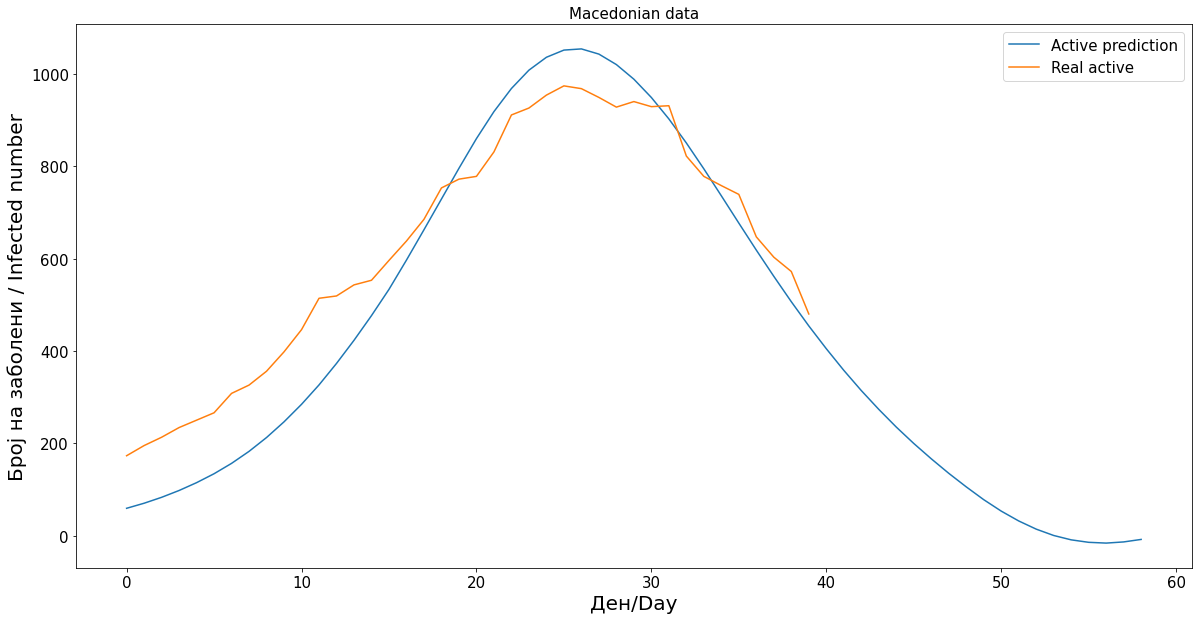

In [22]:
plt.figure(figsize=(20,10))
plt.title('Macedonian data', fontsize=15)
plt.plot(forecast_predictions_mkd, label = 'Active prediction')
plt.plot(active, label = 'Real active')
plt.xlabel("Ден/Day", fontsize=20)
plt.ylabel("Активни потврдени вкупно /  Active confirmed cases total", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)